# 실습1

## 0. 모듈 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


from statsmodels.formula.api import ols
from pydoc import help

from statsmodels.api import Logit
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, scale
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.svm import SVC
from sklearn.metrics import f1_score

import scipy.stats as stats

import graphviz

%matplotlib inline

matplotlib.rc('font', family = 'NanumGothic')
matplotlib.rc('axes', unicode_minus=False)

from matplotlib import rc, font_manager

import warnings
warnings.filterwarnings('ignore')

## 1. 데이터 불러오기

In [2]:
df = pd.read_csv("SCALE불량.csv", encoding = 'euc-kr')

In [3]:
df.head()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1125,934,적용,8,2조
1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1120,937,적용,8,2조
2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1106,889,적용,8,3조
3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1113,885,적용,8,3조
4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1118,873,적용,8,1조


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PLATE_NO           720 non-null    object 
 1   ROLLING_DATE       720 non-null    object 
 2   SCALE              720 non-null    object 
 3   SPEC               720 non-null    object 
 4   STEEL_KIND         720 non-null    object 
 5   PT_THK             720 non-null    float64
 6   PT_WDTH            720 non-null    int64  
 7   PT_LTH             720 non-null    int64  
 8   PT_WGT             720 non-null    int64  
 9   FUR_NO             720 non-null    object 
 10  FUR_NO_ROW         720 non-null    int64  
 11  FUR_HZ_TEMP        720 non-null    int64  
 12  FUR_HZ_TIME        720 non-null    int64  
 13  FUR_SZ_TEMP        720 non-null    int64  
 14  FUR_SZ_TIME        720 non-null    int64  
 15  FUR_TIME           720 non-null    int64  
 16  FUR_EXTEMP         720 non

In [5]:
df.describe()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,29.267857,2807.127778,34323.269444,41481.777778,1.497222,1155.338889,88.204167,1149.666667,75.330556,300.563889,1139.570833,933.920833,8.319444
std,19.152651,517.839690,13828.434837,24751.322015,0.500340,20.866398,36.248696,17.571788,26.086390,45.390303,17.857121,107.863887,1.623252
min,12.030000,1800.000000,7893.000000,7820.000000,1.000000,1103.000000,43.000000,1113.000000,35.000000,221.000000,1102.000000,0.000000,5.000000
25%,16.090000,2466.000000,22663.000000,17757.500000,1.000000,1139.000000,65.000000,1132.000000,57.750000,257.000000,1122.750000,889.750000,6.000000
50%,20.130000,2725.000000,37380.000000,36120.000000,1.000000,1158.000000,75.000000,1155.000000,67.500000,304.000000,1144.000000,951.000000,8.000000
75%,40.000000,3125.000000,43735.000000,61120.000000,2.000000,1171.000000,101.000000,1164.000000,85.250000,342.000000,1154.000000,994.250000,10.000000
max,100.340000,4575.000000,54917.000000,115080.000000,2.000000,1206.000000,251.000000,1185.000000,194.000000,398.000000,1175.000000,1078.000000,10.000000


In [6]:
df['SCALE'] = df['SCALE'].map(lambda x : 0 if x == "양품" else 1)

양품 0, 불량 1로 변환

데이터 자료들 중 아래의 변수들은 제외하도록 한다. (제외 사유)
- PLATE_NO (고유의 ID로 불필요하다고 판단)
- ROLLING_DATE (8/1~2 Data로 시간별로 세세하기 쪼개기 불필요하다고 판단)
- SPEC (제품 규격이 다양해서 따로 범주화하기 어려움)

In [7]:
df_raw = df.drop(["PLATE_NO", "ROLLING_DATE", "SPEC"], axis = 1, inplace = False)

In [8]:
df_raw.head()

,SCALE,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,0,T1,32.25,3707,15109,14180,1호기,1,1144,116,1133,59,282,1125,934,적용,8,2조
1,0,T1,32.25,3707,15109,14180,1호기,2,1144,122,1135,53,283,1120,937,적용,8,2조
2,0,T8,33.27,3619,19181,18130,2호기,1,1129,116,1121,55,282,1106,889,적용,8,3조
3,0,T8,33.27,3619,19181,18130,2호기,2,1152,125,1127,68,316,1113,885,적용,8,3조
4,0,T8,38.33,3098,13334,12430,3호기,1,1140,134,1128,48,314,1118,873,적용,8,1조


## 2. 데이터 정제

### 1) 결측치 확인

In [9]:
df_raw.isnull().sum()

SCALE                0
STEEL_KIND           0
PT_THK               0
PT_WDTH              0
PT_LTH               0
PT_WGT               0
FUR_NO               0
FUR_NO_ROW           0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      0
HSB                  0
ROLLING_DESCALING    0
WORK_GR              0
dtype: int64

결측치를 확인한 결과 존재하지 않는다.

### 2) 이상치 확인

In [10]:
def outlier_iqr(data, column):
    # lower, upper 글로벌 변수 선언하기
    global lower, upper
    
    #4 분위수 기준 정하기
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)
    
    # IQR 계산하기
    iqr = q75 - q25
    
    # outlier cutoff 게산하기
    cut_off = iqr * 1.5
    
    # lower와 upper bound 값 구하기
    lower, upper = q25 - cut_off, q75 + cut_off
    
    print('IQR은', iqr.round(3), '이다.')
    print('lower bound 값은', lower.round(3), '이다.')
    print('upper bound 값은', upper.round(3), '이다.')
    
    # 1사 분위와 4사 분위에 속해있는 데이터 각각 저장하기
    data1 = data[data[column]>upper]
    data2 = data[data[column]<lower]
    
    # 이상치 총 개수 구하기
    return print('총 이상치 개수는', data1.shape[0] + data2.shape[0], '이다.')

In [11]:
outlier_iqr(df, 'PT_THK')

IQR은 23.91 이다.
lower bound 값은 -19.775 이다.
upper bound 값은 75.865 이다.
총 이상치 개수는 16 이다.


In [12]:
outlier_iqr(df, 'PT_WDTH')

IQR은 659.0 이다.
lower bound 값은 1477.5 이다.
upper bound 값은 4113.5 이다.
총 이상치 개수는 12 이다.


In [13]:
outlier_iqr(df, 'PT_LTH')

IQR은 21072.0 이다.
lower bound 값은 -8945.0 이다.
upper bound 값은 75343.0 이다.
총 이상치 개수는 0 이다.


In [14]:
outlier_iqr(df, 'PT_WGT')

IQR은 43362.5 이다.
lower bound 값은 -47286.25 이다.
upper bound 값은 126163.75 이다.
총 이상치 개수는 0 이다.


In [15]:
outlier_iqr(df, 'FUR_NO_ROW')

IQR은 1.0 이다.
lower bound 값은 -0.5 이다.
upper bound 값은 3.5 이다.
총 이상치 개수는 0 이다.


In [16]:
outlier_iqr(df, 'FUR_HZ_TEMP')

IQR은 32.0 이다.
lower bound 값은 1091.0 이다.
upper bound 값은 1219.0 이다.
총 이상치 개수는 0 이다.


In [17]:
outlier_iqr(df, 'FUR_HZ_TIME')

IQR은 36.0 이다.
lower bound 값은 11.0 이다.
upper bound 값은 155.0 이다.
총 이상치 개수는 40 이다.


In [18]:
outlier_iqr(df, 'FUR_SZ_TIME')

IQR은 27.5 이다.
lower bound 값은 16.5 이다.
upper bound 값은 126.5 이다.
총 이상치 개수는 42 이다.


In [19]:
outlier_iqr(df, 'FUR_TIME')

IQR은 85.0 이다.
lower bound 값은 129.5 이다.
upper bound 값은 469.5 이다.
총 이상치 개수는 0 이다.


In [20]:
outlier_iqr(df, 'FUR_EXTEMP')

IQR은 31.25 이다.
lower bound 값은 1075.875 이다.
upper bound 값은 1200.875 이다.
총 이상치 개수는 0 이다.


In [21]:
outlier_iqr(df, 'ROLLING_TEMP_T5')

IQR은 104.5 이다.
lower bound 값은 733.0 이다.
upper bound 값은 1151.0 이다.
총 이상치 개수는 7 이다.


In [22]:
outlier_iqr(df, 'ROLLING_DESCALING')

IQR은 4.0 이다.
lower bound 값은 0.0 이다.
upper bound 값은 16.0 이다.
총 이상치 개수는 0 이다.


<AxesSubplot:>

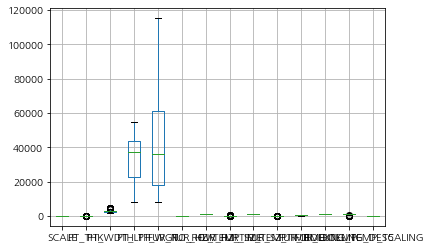

In [23]:
df.boxplot()

## 3. EDA (시각화)

#### Histogram

우선 연속형 변수들만으로 histogram을 통해 각 변수들의 상관도를 보도록 하자.

In [24]:
df_numeric = df.select_dtypes(exclude = 'object')
df_numeric.shape

(720, 14)

In [25]:
df_numeric_x = df_numeric.drop("SCALE", axis = 1)
df_numeric_y = df_numeric["SCALE"]
df_numeric_x.head()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
0,32.25,3707,15109,14180,1,1144,116,1133,59,282,1125,934,8
1,32.25,3707,15109,14180,2,1144,122,1135,53,283,1120,937,8
2,33.27,3619,19181,18130,1,1129,116,1121,55,282,1106,889,8
3,33.27,3619,19181,18130,2,1152,125,1127,68,316,1113,885,8
4,38.33,3098,13334,12430,1,1140,134,1128,48,314,1118,873,8


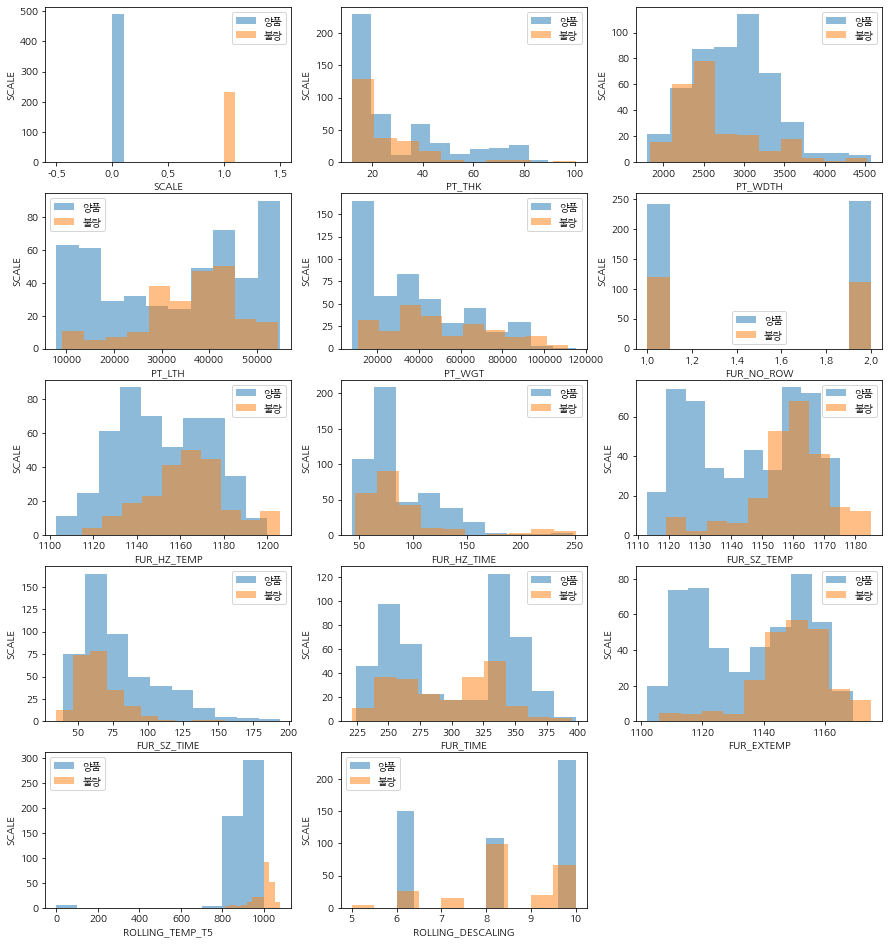

In [26]:
i = 0
fig = plt.figure(figsize = (15, 20))
columns = df_numeric.columns
for col in df_numeric.columns:
    plt.subplot(df_raw.shape[1]//3, 3, i+1)
    i += 1
    plt.hist(df_raw[df_raw["SCALE"] == 0][col], label = "양품", alpha = 0.5)
    plt.hist(df_raw[df_raw["SCALE"] == 1][col], label = "불량", alpha = 0.5)
    plt.xlabel(col)
    plt.ylabel("SCALE")
    plt.legend()
plt.show()

Histogram 분석결과 Plate 폭이 작을수록, 가열로 가열대 온도가 높을수록, 가열로 균열대 온도가 높을수록, 추출 온도가 높을수록 불량이 되는 경향을 보였다.

### 1) 각 변수별 Scale과의 비교

#### 강종

<AxesSubplot:ylabel='SCALE'>

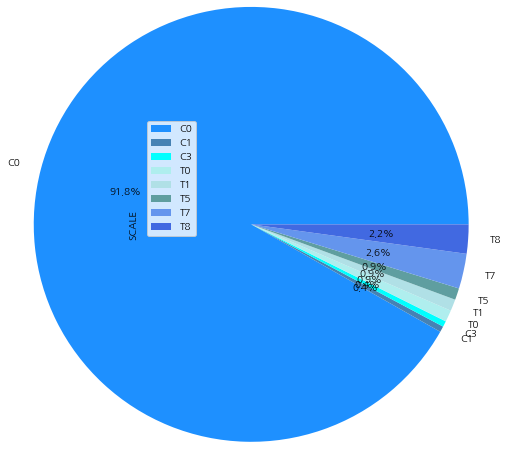

In [27]:
df_SK = df[df["SCALE"] == 1]
df_count = df_SK.groupby("STEEL_KIND", as_index = False).agg("count")
colors = ['dodgerblue', 'steelblue', 'cyan', 'paleturquoise', 'powderblue', 'cadetblue', 'cornflowerblue', 'royalblue', 'darkblue']

df_count.plot.pie(y="SCALE", labels = df_count["STEEL_KIND"], autopct="%.1f%%", radius = 2.5, colors = colors)

강종에서 불량품(1)인 경우 C0인 경우가 91.8%나 차지한다. 전체 생상에서 C0가 많은 비중을 차지하기 때문임을 아래를 통해 확인할 수 있다.

In [28]:
df.groupby("STEEL_KIND").count()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
STEEL_KIND,,,,,,,,,,,,,,,,,,,,
C0,503,503,503,503,503,503,503,503,503,503,503,503,503,503,503,503,503,503,503,503
C1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
C3,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
T0,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
T1,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
T3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
T5,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43
T7,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35
T8,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95


절대적인 수치가 아닌 상대적인 수치로 불량 발생률을 보기 위해 아래와 같은 작업을 실시하였다.

In [29]:
df_SK_group = df.groupby(["STEEL_KIND"])["SCALE"]
df_SK_group1 = pd.DataFrame(columns = ["STEEL_KIND", "SCALE_PROB"])

c=0
for sk, per in df_SK_group:
    c += per.tolist().count(1)/(per.shape[0])
    df_SK_group1 = df_SK_group1.append({"STEEL_KIND" : sk , "SCALE_PROB" : (per.tolist().count(1)/(per.shape[0])) * 100}, ignore_index = True )
df_SK_group1

,STEEL_KIND,SCALE_PROB
0,C0,42.147117
1,C1,100.000000
2,C3,14.285714
3,T0,12.500000
4,T1,11.111111
5,T3,0.000000
6,T5,4.651163
7,T7,17.142857
8,T8,5.263158


위의 표를 보아하니 C0의 경우 전체 불량의 42.1%를 차지하고 T1도 꽤 높은 수치인 17.1%를 차지하는 것을 알 수 있다. C1의 경우 100%의 불량률을 보이나, 실제 수치를 확인해보면 1개로 크게 의미를 두어 볼 필요가 없어보인다.

#### 가열호 호기

<AxesSubplot:ylabel='SCALE'>

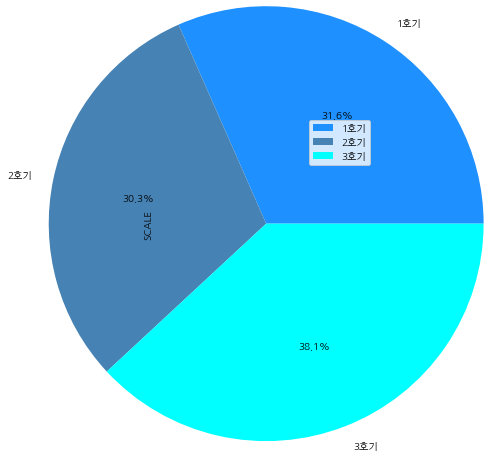

In [30]:
df_FN = df[df["SCALE"] == 1]
df_count = df_FN.groupby("FUR_NO", as_index = False).agg("count")
colors = ['dodgerblue', 'steelblue', 'cyan', 'paleturquoise']

df_count.plot.pie(y="SCALE", labels = df_count["FUR_NO"], autopct="%.1f%%", radius = 2.5, colors = colors)

In [31]:
df.groupby("FUR_NO").count()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
FUR_NO,,,,,,,,,,,,,,,,,,,,
1호기,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240
2호기,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237,237
3호기,243,243,243,243,243,243,243,243,243,243,243,243,243,243,243,243,243,243,243,243


가열호 1~3호에 각각 240, 237, 243씩 생산되었고 또한 불량률이 특별하게 한쪽에 쏠려 분포되지 않은 것을 파악할 수 있다. 따라서 가열호 차이는 불량률 발생을 야기하는 요소라고 볼 수 없다.

In [32]:
df_groups = df.groupby(["FUR_NO"])["SCALE"]
df_wg = pd.DataFrame(columns = ["FUR_NO", "PROB"])
for wg, per in df_groups:
    df_wg = df_wg.append({"FUR_NO" : wg , "PROB" : per.tolist().count(1)/(per.shape[0])}, ignore_index = True )
df_wg.round(3)

,FUR_NO,PROB
0,1호기,0.304
1,2호기,0.295
2,3호기,0.362


#### 그룹

In [33]:
df_groups = df.groupby(["WORK_GR"])["SCALE"]
df_wg = pd.DataFrame(columns = ["WORK_GR", "PROB"])
for wg, per in df_groups:
    df_wg = df_wg.append({"WORK_GR" : wg , "PROB" : per.tolist().count(1)/(per.shape[0])}, ignore_index = True )
df_wg

,WORK_GR,PROB
0,1조,0.354497
1,2조,0.272727
2,3조,0.313953
3,4조,0.335052


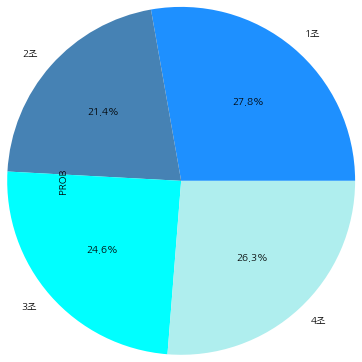

In [34]:
df_wg.plot.pie(y = "PROB", labels = df_wg["WORK_GR"], autopct= "%.1f%%", radius = 2, legend = False, colors = colors)
colors = ['dodgerblue', 'steelblue', 'cyan', 'paleturquoise', 'powderblue', 'cadetblue', 'cornflowerblue', 'royalblue', 'darkblue']

작업조가 1조, 4조인 경우 불량률이 높게 나타났다.

#### HSB적용 여부

In [35]:
df['HSB'] = df['HSB'].map(lambda x : 0 if x == "적용" else 1)
df

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1125,934,0,8,2조
1,PB562775,2008-08-01:00:00:16,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1120,937,0,8,2조
2,PB562776,2008-08-01:00:00:59,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1106,889,0,8,3조
3,PB562777,2008-08-01:00:01:24,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1113,885,0,8,3조
4,PB562778,2008-08-01:00:01:44,0,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1118,873,0,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,PB563502,2008-08-02:13:35:36,1,NK-KA,C0,20.14,3580,38639,21870,3호기,...,1172,72,1164,62,245,1155,1005,0,8,2조
716,PB563503,2008-08-02:13:35:02,0,NV-A32,C0,15.08,3212,48233,18340,2호기,...,1150,61,1169,61,238,1160,947,0,10,1조
717,PB563504,2008-08-02:14:40:00,0,NV-A32,C0,16.60,3441,43688,19590,2호기,...,1169,65,1163,77,247,1152,948,0,10,4조
718,PB563505,2008-08-02:13:35:19,0,LR-A,C0,15.59,3363,48740,80240,3호기,...,1179,86,1163,45,243,1154,940,0,10,2조


HSB란  - 너무 예측률이 높아지기에 제거 필요 **

In [36]:
df_groups = df.groupby(["HSB"])["SCALE"]
df_w = pd.DataFrame(columns = ["HSB", "SCALE_PROB"])
c = 0.0
for name, g in df_groups:
    df_w = df_w.append({"HSB" : name , "SCALE_PROB" : (g.tolist().count(1)/(g.shape[0]))}, ignore_index = True )
df_w

,HSB,SCALE_PROB
0,0.0,0.28821
1,1.0,1.00000


HSB 적용 여부에 따른 불량률을 확인해보았다. 그 결과, HSB를 미적용한 경우 100%의 확률로 불량률이 발생한 것을 알 수 있다.

In [37]:
df_raw = df_raw.drop(["HSB"], axis = 1, inplace = False)

array([[<AxesSubplot:title={'center':'SCALE'}>,
        <AxesSubplot:title={'center':'PT_THK'}>,
        <AxesSubplot:title={'center':'PT_WDTH'}>,
        <AxesSubplot:title={'center':'PT_LTH'}>],
       [<AxesSubplot:title={'center':'PT_WGT'}>,
        <AxesSubplot:title={'center':'FUR_NO_ROW'}>,
        <AxesSubplot:title={'center':'FUR_HZ_TEMP'}>,
        <AxesSubplot:title={'center':'FUR_HZ_TIME'}>],
       [<AxesSubplot:title={'center':'FUR_SZ_TEMP'}>,
        <AxesSubplot:title={'center':'FUR_SZ_TIME'}>,
        <AxesSubplot:title={'center':'FUR_TIME'}>,
        <AxesSubplot:title={'center':'FUR_EXTEMP'}>],
       [<AxesSubplot:title={'center':'ROLLING_TEMP_T5'}>,
        <AxesSubplot:title={'center':'HSB'}>,
        <AxesSubplot:title={'center':'ROLLING_DESCALING'}>,
        <AxesSubplot:>]], dtype=object)

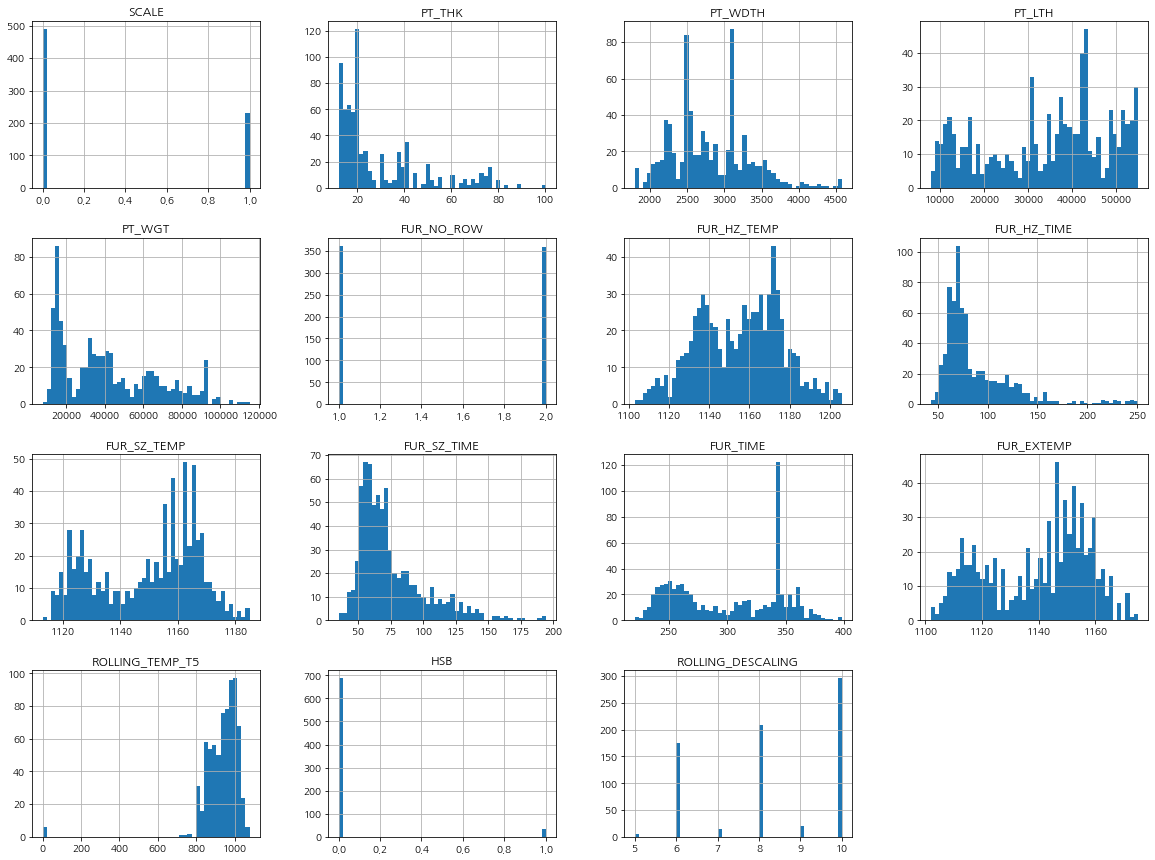

In [38]:
df.hist(bins=50, figsize=(20,15)) #"bins: 구간 경곗값

### 2) 각 변수들의 상관도 비교

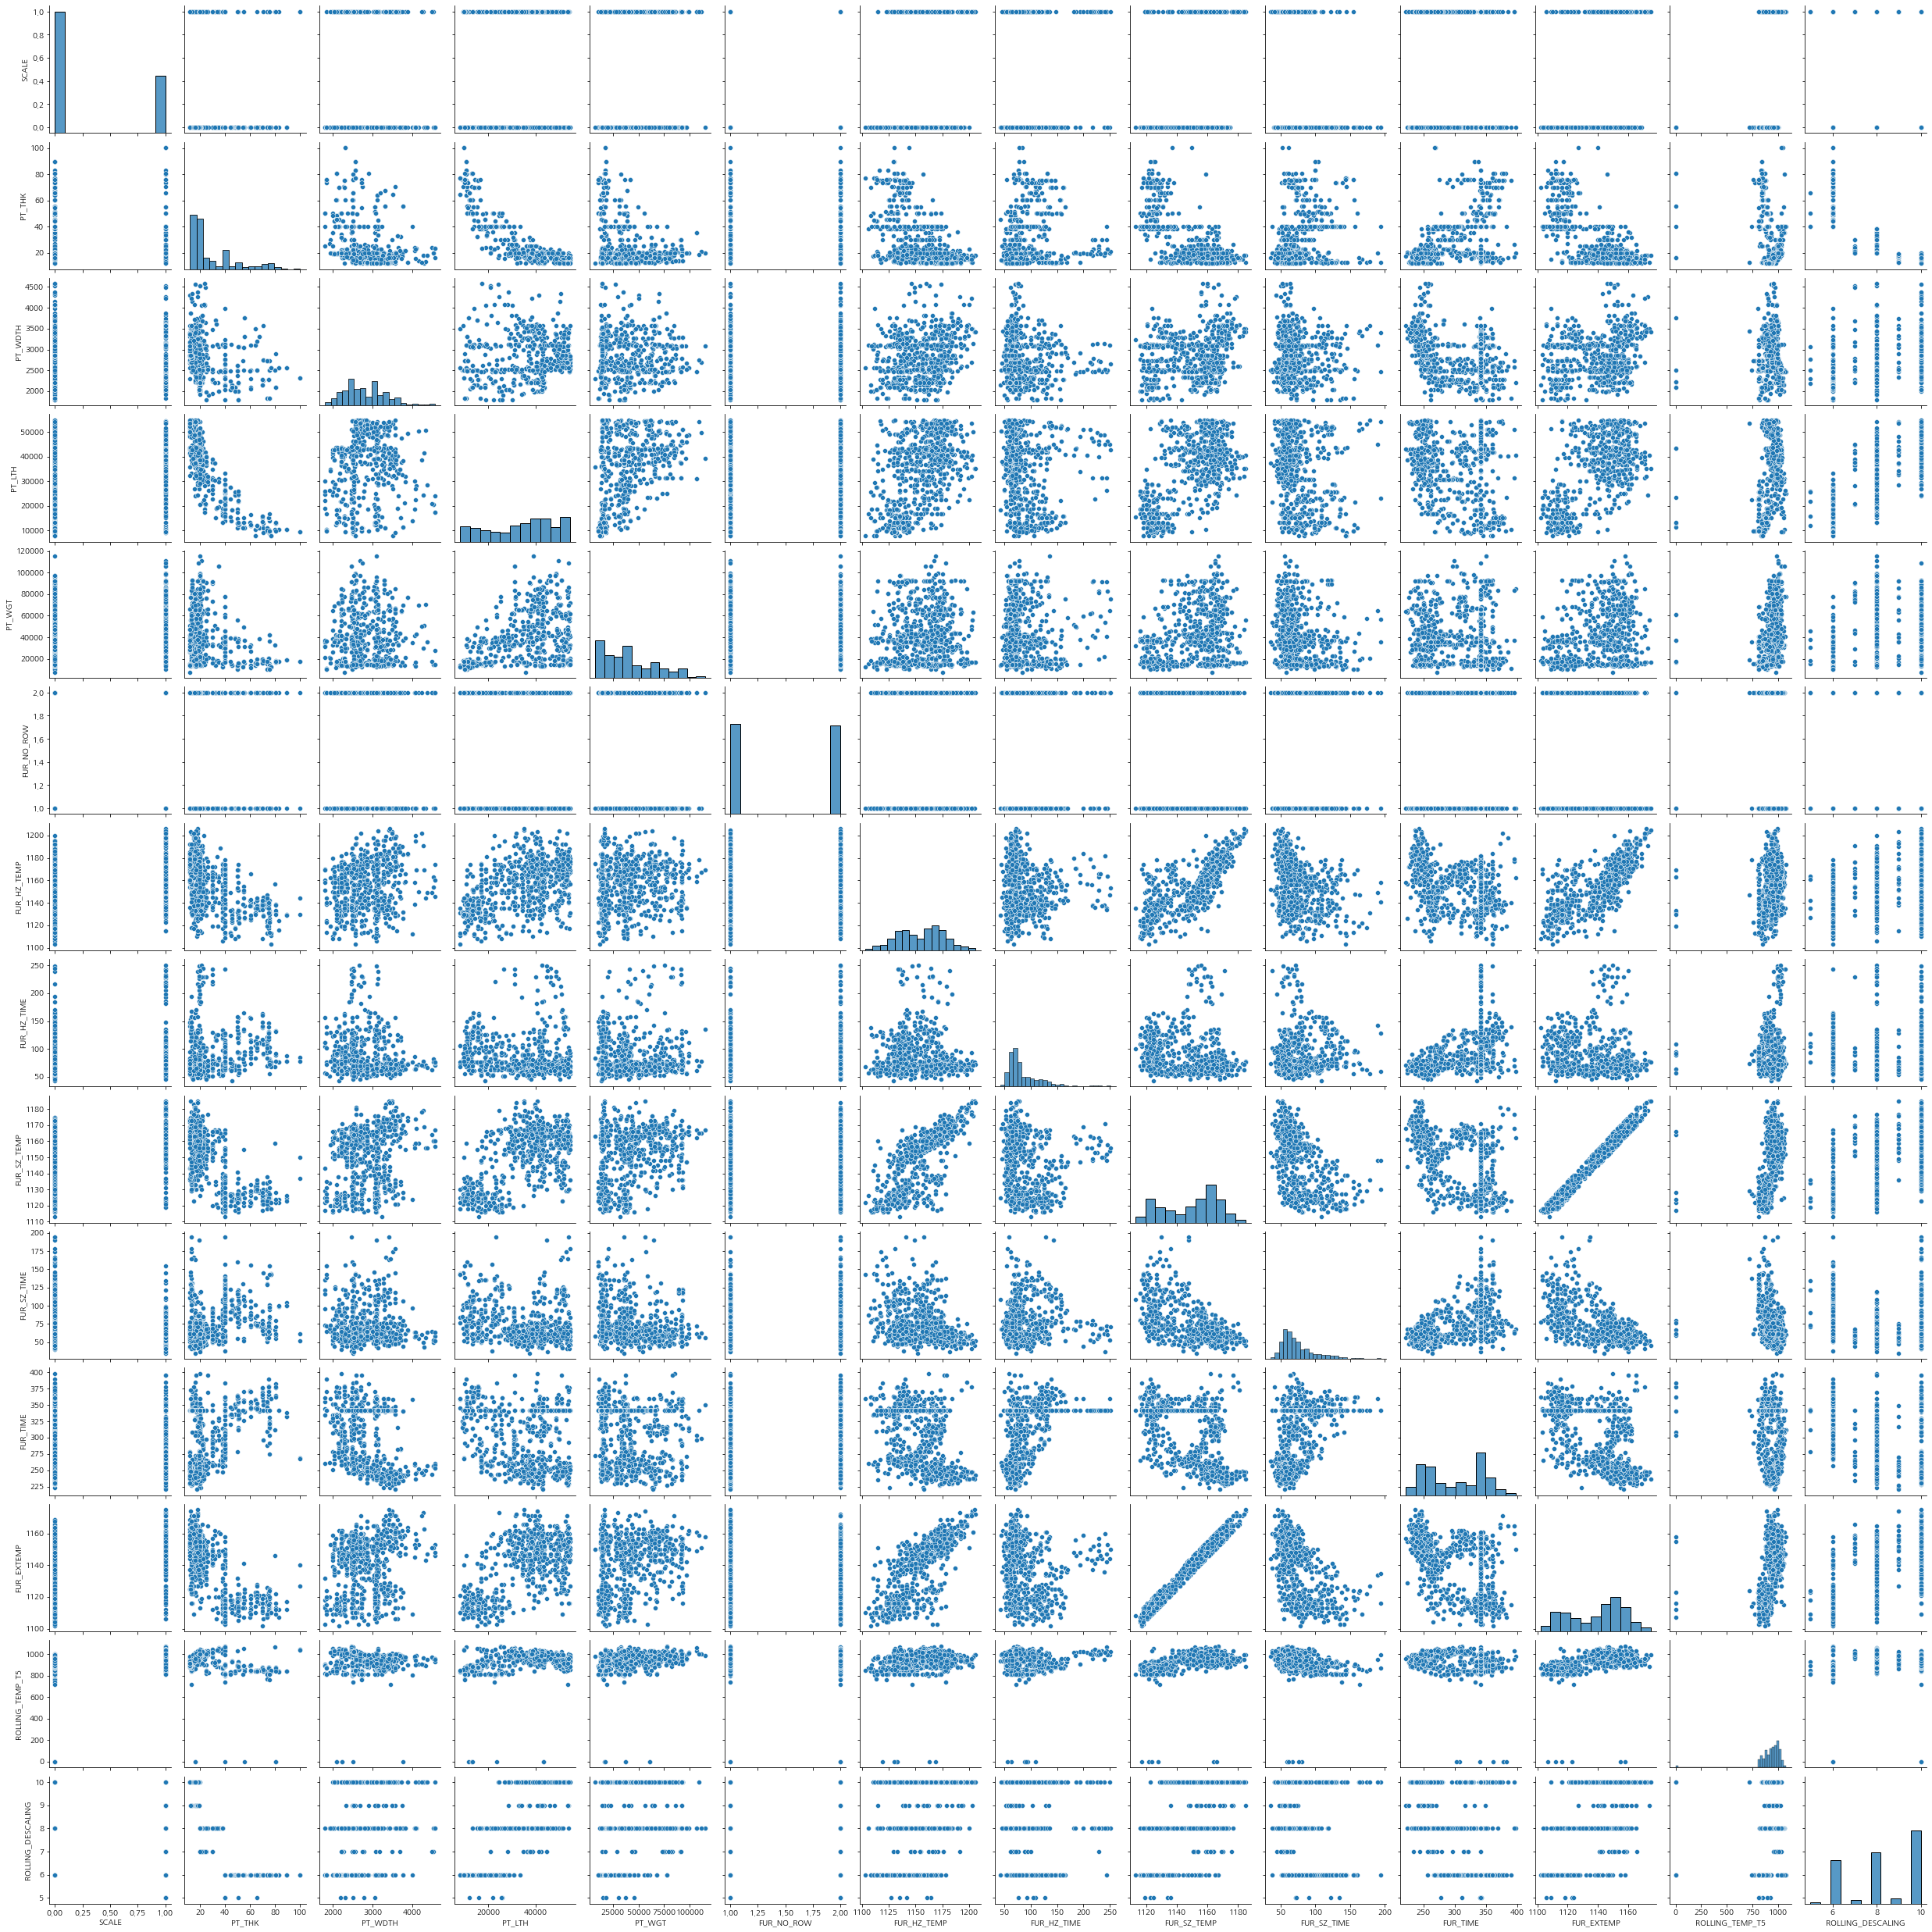

In [39]:
sns.pairplot(df_raw)

산점도를 확인한 결과 눈에 띄게 선형관계를 갖고 있는 변수를 찾을 수 있다. 
: FUR_SZ_TEMP(가열로 균열대 온도)와 FUR_EXTEMP(압연온도)

<AxesSubplot:>

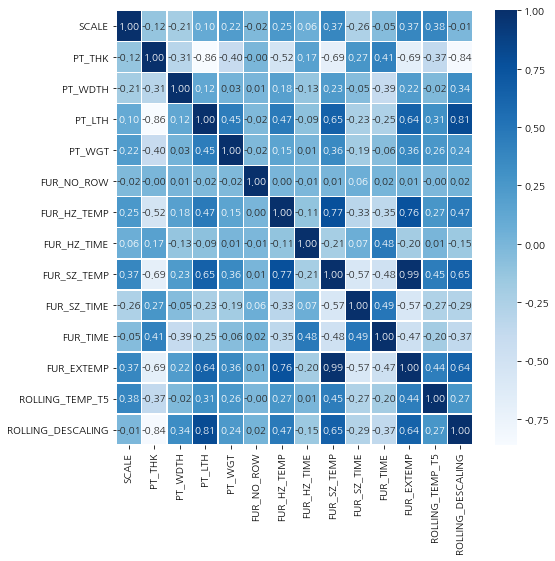

In [40]:
plt.figure(figsize=(8,8))
sns.heatmap(data = df_raw.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

In [41]:
df_raw.corr().round(3)

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
SCALE,1.000,-0.125,-0.206,0.100,0.219,-0.023,0.248,0.064,0.375,-0.255,-0.049,0.375,0.385,-0.007
PT_THK,-0.125,1.000,-0.313,-0.863,-0.397,-0.003,-0.524,0.172,-0.695,0.269,0.413,-0.688,-0.374,-0.837
PT_WDTH,-0.206,-0.313,1.000,0.120,0.031,0.007,0.180,-0.126,0.227,-0.051,-0.393,0.216,-0.022,0.338
PT_LTH,0.100,-0.863,0.120,1.000,0.452,-0.021,0.473,-0.090,0.645,-0.230,-0.252,0.641,0.313,0.809
PT_WGT,0.219,-0.397,0.031,0.452,1.000,-0.022,0.153,0.007,0.360,-0.193,-0.058,0.361,0.263,0.239
FUR_NO_ROW,-0.023,-0.003,0.007,-0.021,-0.022,1.000,0.005,-0.008,0.009,0.062,0.016,0.014,-0.004,0.018
FUR_HZ_TEMP,0.248,-0.524,0.180,0.473,0.153,0.005,1.000,-0.112,0.773,-0.328,-0.348,0.758,0.265,0.471
FUR_HZ_TIME,0.064,0.172,-0.126,-0.090,0.007,-0.008,-0.112,1.000,-0.210,0.068,0.483,-0.196,0.010,-0.152
FUR_SZ_TEMP,0.375,-0.695,0.227,0.645,0.360,0.009,0.773,-0.210,1.000,-0.566,-0.477,0.985,0.452,0.649
FUR_SZ_TIME,-0.255,0.269,-0.051,-0.230,-0.193,0.062,-0.328,0.068,-0.566,1.000,0.491,-0.566,-0.269,-0.286


상관관계를 살펴보면 다음과 같다. (기준: 0.5 이상)
- PT_THK: PT_LTH -0.863 / FUR_HZ_TEMP -0.524 / FUR_SZ_TEMP -0.695 / FUR_EXTEMP -0.688 / ROLLING_DESCALING -0.837
- PT_LTH: FUR_SZ_TEMP 0.645 / FUR_EXTEMP 0.641 / ROLING_DESCALING 0.809
- FUR_HZ_TEMP: FUR_SZ_TEMP 0.773 / FUR_EXTEMP 0.758
- FUR_SZ_TEMP: FUR_EXTEMP 0.985 / ROLING_DESCALING 0.649
- FUR_EXTEM: ROLLING_TEMP_T5

이중, FUR_SZ_TEMP 와 FUR_EXTEMP는 0.985라는 거의 일치하는 상관성을 가지므로 하나만 선택해도 무방하다.

In [42]:
df_raw.drop("FUR_EXTEMP", axis =1, inplace=True)

## 4. 검정

Plate 불량과 정상 간의 차이가 있는지 확인

<AxesSubplot:title={'center':'PT_THK'}, xlabel='[SCALE]'>

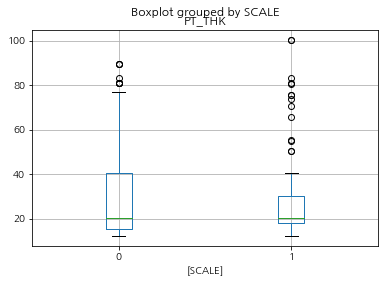

In [43]:
df_raw.boxplot(column="PT_THK", by = ["SCALE"])

양품이 0, 불량이 1

In [44]:
pt_thk0 = pd.DataFrame(df_raw[df['SCALE']==1]['PT_THK'])
pt_thk0

,PT_THK
11,38.43
15,50.46
60,65.69
71,73.71
79,75.71
...,...
677,33.67
683,13.57
685,19.63
700,12.05


In [45]:
pt_thk1 = pd.DataFrame(df_raw[df['SCALE']==1]['PT_THK'])
pt_thk1

,PT_THK
11,38.43
15,50.46
60,65.69
71,73.71
79,75.71
...,...
677,33.67
683,13.57
685,19.63
700,12.05


In [46]:
t_result = stats.ttest_ind(pt_thk0, pt_thk1)

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
t:[0.]
p:[1.]


## 5. 모델링

총 720개 자료로 Test와 Train의 비율을 7:3으로 하고자 한다.

### 1) 로지스틱 회귀

In [47]:
df_num = df.select_dtypes(exclude = 'object')
df_num.head()

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING
0,0,32.25,3707,15109,14180,1,1144,116,1133,59,282,1125,934,0,8
1,0,32.25,3707,15109,14180,2,1144,122,1135,53,283,1120,937,0,8
2,0,33.27,3619,19181,18130,1,1129,116,1121,55,282,1106,889,0,8
3,0,33.27,3619,19181,18130,2,1152,125,1127,68,316,1113,885,0,8
4,0,38.33,3098,13334,12430,1,1140,134,1128,48,314,1118,873,0,8


표준화 작업을 실시

In [48]:
df_numeric = df.select_dtypes(exclude = "object")
df_char = df.select_dtypes(include = "object")

scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns = df_numeric.columns)

df_scaled = pd.concat([df_numeric_scaled, df_char], axis = 1)
df_scaled.head()

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,...,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,PLATE_NO,ROLLING_DATE,SPEC,STEEL_KIND,FUR_NO,WORK_GR
0,-0.687308,0.155812,1.738951,-1.390441,-1.103810,-0.994460,-0.543782,0.767342,-0.949149,-0.626453,...,-0.816535,0.000734,-0.219169,-0.19693,PB562774,2008-08-01:00:00:15,AB/EH32-TM,T1,1호기,2조
1,-0.687308,0.155812,1.738951,-1.390441,-1.103810,1.005571,-0.543782,0.932981,-0.835252,-0.856618,...,-1.096730,0.028567,-0.219169,-0.19693,PB562775,2008-08-01:00:00:16,AB/EH32-TM,T1,1호기,2조
2,-0.687308,0.209106,1.568896,-1.095771,-0.944112,-0.994460,-1.263141,0.767342,-1.632537,-0.779897,...,-1.881276,-0.416748,-0.219169,-0.19693,PB562776,2008-08-01:00:00:59,NV-E36-TM,T8,2호기,3조
3,-0.687308,0.209106,1.568896,-1.095771,-0.944112,1.005571,-0.160124,1.015800,-1.290843,-0.281206,...,-1.489003,-0.453858,-0.219169,-0.19693,PB562777,2008-08-01:00:01:24,NV-E36-TM,T8,2호기,3조
4,-0.687308,0.473482,0.562094,-1.518889,-1.174562,-0.994460,-0.735611,1.264257,-1.233894,-1.048422,...,-1.208808,-0.565186,-0.219169,-0.19693,PB562778,2008-08-01:00:01:44,BV-EH36-TM,T8,3호기,1조


In [49]:
df_scaled["SCALE"] = np.where(df_scaled["SCALE"] > 0,1,0)
df_scaled.head()

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,...,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,PLATE_NO,ROLLING_DATE,SPEC,STEEL_KIND,FUR_NO,WORK_GR
0,0,0.155812,1.738951,-1.390441,-1.103810,-0.994460,-0.543782,0.767342,-0.949149,-0.626453,...,-0.816535,0.000734,-0.219169,-0.19693,PB562774,2008-08-01:00:00:15,AB/EH32-TM,T1,1호기,2조
1,0,0.155812,1.738951,-1.390441,-1.103810,1.005571,-0.543782,0.932981,-0.835252,-0.856618,...,-1.096730,0.028567,-0.219169,-0.19693,PB562775,2008-08-01:00:00:16,AB/EH32-TM,T1,1호기,2조
2,0,0.209106,1.568896,-1.095771,-0.944112,-0.994460,-1.263141,0.767342,-1.632537,-0.779897,...,-1.881276,-0.416748,-0.219169,-0.19693,PB562776,2008-08-01:00:00:59,NV-E36-TM,T8,2호기,3조
3,0,0.209106,1.568896,-1.095771,-0.944112,1.005571,-0.160124,1.015800,-1.290843,-0.281206,...,-1.489003,-0.453858,-0.219169,-0.19693,PB562777,2008-08-01:00:01:24,NV-E36-TM,T8,2호기,3조
4,0,0.473482,0.562094,-1.518889,-1.174562,-0.994460,-0.735611,1.264257,-1.233894,-1.048422,...,-1.208808,-0.565186,-0.219169,-0.19693,PB562778,2008-08-01:00:01:44,BV-EH36-TM,T8,3호기,1조


In [50]:
df_train, df_test = train_test_split(df_scaled, test_size = 0.3, random_state =1234)
print("train data size: {}".format(df_train.shape))
print("test data size: {}".format(df_test.shape))

train data size: (504, 21)
test data size: (216, 21)


In [51]:
scaled_log_model = Logit.from_formula("""SCALE ~ C(STEEL_KIND) + PT_THK + PT_WDTH + PT_LTH +PT_WGT + C(FUR_NO) + FUR_HZ_TEMP + 
                                    FUR_HZ_TIME + FUR_SZ_TEMP + FUR_SZ_TIME + ROLLING_TEMP_T5 + ROLLING_DESCALING +
                                    C(WORK_GR)""", data = df_scaled)
scaled_log_result = scaled_log_model.fit(method = 'bfgs')
print(scaled_log_result.summary())

         Current function value: 0.360586
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  720
Model:                          Logit   Df Residuals:                      696
Method:                           MLE   Df Model:                           23
Date:                Wed, 10 Nov 2021   Pseudo R-squ.:                  0.4254
Time:                        21:24:59   Log-Likelihood:                -259.62
converged:                      False   LL-Null:                       -451.80
Covariance Type:            nonrobust   LLR p-value:                 2.930e-67
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -1.3874      0.443     -3.129      

해당 모델의 설명력은 42.54% 이다.

표준화 회귀 계수

<AxesSubplot:>

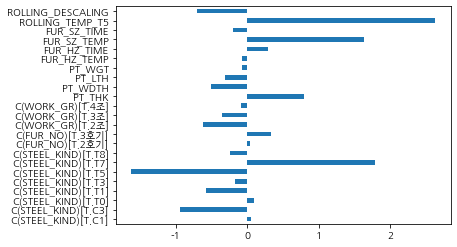

In [52]:
df_log_scaled_coef = pd.DataFrame({"Coef": scaled_log_result.params.values[1:]},
                                 index = scaled_log_model.exog_names[1:])
df_log_scaled_coef.plot.barh(y="Coef", legend=False)

정확도 예측


In [53]:
train_y_pred = scaled_log_result.predict(df_train)
train_y_pred_class = (train_y_pred > 0.5).astype(int)
log_train_acc = metrics.accuracy_score(df_train["SCALE"], train_y_pred_class)

y_pred = scaled_log_result.predict(df_test)
y_pred_class = (y_pred > 0.5).astype(int)
y_pred_class.head()
print(log_train_acc)

log_f1_score = f1_score(df_test["SCALE"], y_pred_class)
print(log_f1_score)

0.8511904761904762
0.7260273972602739


In [54]:
log_test_acc = metrics.accuracy_score(df_test["SCALE"], y_pred_class)
print("Accuracy : {0:.3f}".format(metrics.accuracy_score(df_test["SCALE"], y_pred_class)))

Accuracy : 0.815


로지스틱 회귀모델로 0.815의 정확도를 보였다.


### 2) 의사결정나무

In [55]:
df_dummy = pd.get_dummies(df_raw)

df_y = df_dummy["SCALE"]
df_x = df_dummy.drop("SCALE", axis = 1, inplace = False)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.3, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (504, 28)
train data Y size : (504,)
test data X size : (216, 28)
test data Y size : (216,)


In [56]:
param_grid = {'criterion' : ['gini','entropy'],'max_depth' : [i for i in range(1, 11, 1)], 'min_samples_leaf': [i*10 for i in range(1, 6, 1)]}
train_accuracy = []; test_accuracy = [];
param_criterion = []; param_depth = [];
#for criterion in list_criterion:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid)
tree.fit(df_train_x, df_train_y)
train_accuracy.append(tree.score(df_train_x, df_train_y))
test_accuracy.append(tree.score(df_test_x, df_test_y))
print(tree.best_params_)

tree_train_acc = tree.score(df_train_x, df_train_y)
tree_test_acc = tree.score(df_test_x, df_test_y)
tree_f1_score = f1_score(df_test_y, tree.predict(df_test_x))

df_gridsearch = pd.DataFrame()
df_gridsearch['TrainAccuracy'] = train_accuracy
df_gridsearch['TestAccuracy'] = test_accuracy
df_gridsearch

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10}


,TrainAccuracy,TestAccuracy
0,0.938492,0.944444


In [57]:
tree_final = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_leaf=10, random_state=1234)
tree_final.fit(df_train_x, df_train_y)



DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10,
                       random_state=1234)

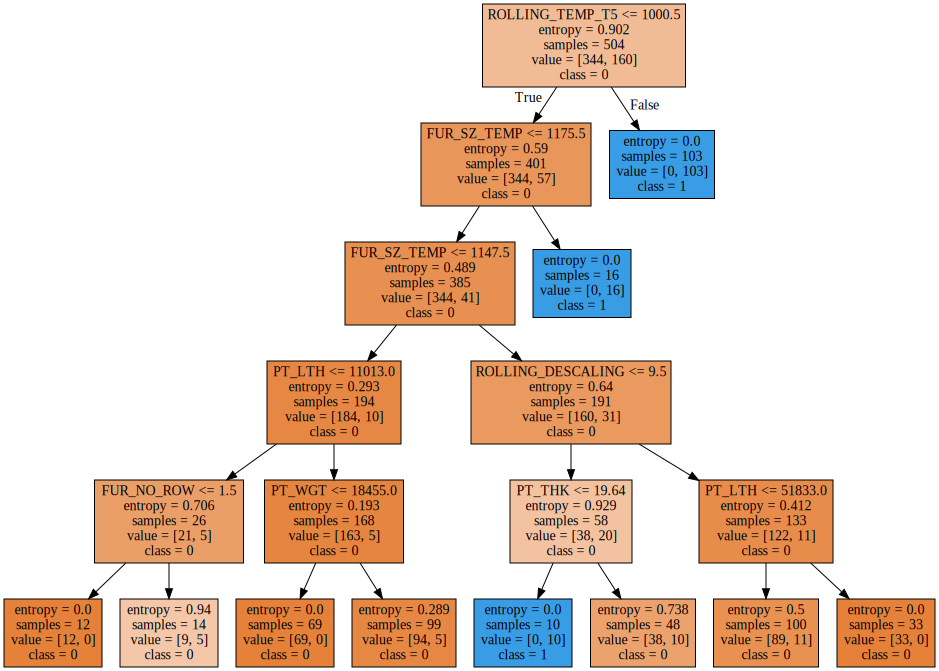

In [58]:
export_graphviz(tree_final, out_file = "tree_final.dot", class_names=["0", "1"],
               feature_names=df_train_x.columns, impurity=True, filled = True)
with open("tree_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [59]:
df_feature_importance = pd.DataFrame()
df_feature_importance["Feature"] = df_train_x.columns
df_feature_importance["Importance"] = tree_final.feature_importances_
df_feature_importance.sort_values("Importance", ascending = False, inplace = True)
df_feature_importance.round(3)

,Feature,Importance
10,ROLLING_TEMP_T5,0.666
7,FUR_SZ_TEMP,0.176
0,PT_THK,0.056
11,ROLLING_DESCALING,0.041
2,PT_LTH,0.033
4,FUR_NO_ROW,0.016
3,PT_WGT,0.012
19,STEEL_KIND_T7,0.000
20,STEEL_KIND_T8,0.000
21,FUR_NO_1호기,0.000


In [60]:
y_pred = tree_final.predict(df_test_x)
print("Accuracy: {0:.3f}".format(tree_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

print(classification_report(df_test_y, y_pred, digits=3))

Accuracy: 0.944
Confusion matrix: 
[[145   0]
 [ 12  59]]
              precision    recall  f1-score   support

           0      0.924     1.000     0.960       145
           1      1.000     0.831     0.908        71

    accuracy                          0.944       216
   macro avg      0.962     0.915     0.934       216
weighted avg      0.949     0.944     0.943       216



In [61]:
df_importance = pd.DataFrame()
df_importance["Feature"] = df_train_x.columns
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
10,ROLLING_TEMP_T5,0.666
7,FUR_SZ_TEMP,0.176
0,PT_THK,0.056
11,ROLLING_DESCALING,0.041
2,PT_LTH,0.033
4,FUR_NO_ROW,0.016
3,PT_WGT,0.012
19,STEEL_KIND_T7,0.000
20,STEEL_KIND_T8,0.000
21,FUR_NO_1호기,0.000


Text(0, 0.5, '설명변수')

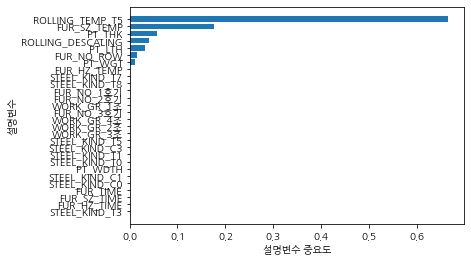

In [62]:
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

### 3) 랜덤 포레스트

In [63]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,...,STEEL_KIND_T5,STEEL_KIND_T7,STEEL_KIND_T8,FUR_NO_1호기,FUR_NO_2호기,FUR_NO_3호기,WORK_GR_1조,WORK_GR_2조,WORK_GR_3조,WORK_GR_4조
0,0,32.25,3707,15109,14180,1,1144,116,1133,59,...,0,0,0,1,0,0,0,1,0,0
1,0,32.25,3707,15109,14180,2,1144,122,1135,53,...,0,0,0,1,0,0,0,1,0,0
2,0,33.27,3619,19181,18130,1,1129,116,1121,55,...,0,0,1,0,1,0,0,0,1,0
3,0,33.27,3619,19181,18130,2,1152,125,1127,68,...,0,0,1,0,1,0,0,0,1,0
4,0,38.33,3098,13334,12430,1,1140,134,1128,48,...,0,0,1,0,0,1,1,0,0,0


In [64]:
df_raw_x = df_raw_dummy.drop("SCALE", axis = 1, inplace = False)
df_raw_y = df_raw_dummy["SCALE"] 

# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: 랜덤)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, # 설명변수 데이터
                                                                df_raw_y, # 목표변수 데이터
                                                                test_size = 0.3, # test 데이터의 비율
                                                                random_state = 1234)  # random state

In [65]:
rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)
print("Accuracy on training set : {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set : {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 1.000
Accuracy on test set : 0.935


In [66]:
train_accuracy=[]; test_accuracy=[]
para_n_tree = [n_tree * 10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators = v_n_estimators, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

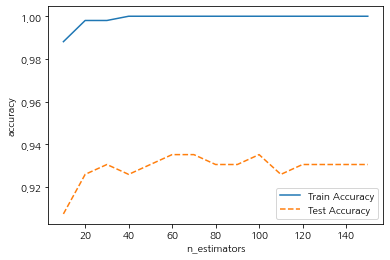

In [67]:
df_accuracy_n.round(3)

plt.plot(para_n_tree, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle="--", label="Test Accuracy")
plt.xlabel("n_estimators");plt.ylabel("accuracy")
plt.legend()

In [68]:
oob_error = []

for v_n_estimator in range(1, 151):
    rf=RandomForestClassifier(n_estimators = v_n_estimator, oob_score=True, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1-rf.oob_score_)

Text(0.5, 0, 'n_estimators')

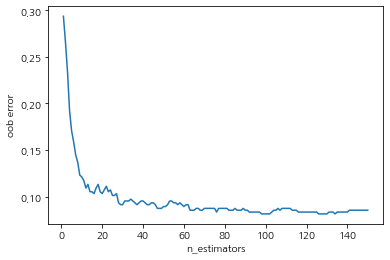

In [69]:
plt.plot(range(1,151), oob_error)
plt.ylabel("oob error")
plt.xlabel("n_estimators")

In [70]:
n_estimators = 100

In [71]:
estimator = RandomForestClassifier(n_estimators=100, random_state=1234)

# param_grid = {"max_depth": para_depth, "min_samples_leaf": para_leaf}

grid_rf = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs=-1)
grid_rf.fit(df_train_x, df_train_y)
print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter: \n{}".format(grid_rf.best_params_))
print("\nbest score: \n{}".format(grid_rf.best_score_.round(3)))

best estimator model: 
RandomForestClassifier(max_depth=7, min_samples_leaf=10, random_state=1234)

best parameter: 
{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 10}

best score: 
0.889


In [72]:
rf_final = RandomForestClassifier(min_samples_leaf = 10, max_depth = 7, n_estimators=100, random_state=1234)
rf_final.fit(df_train_x, df_train_y)
print("Accuracy on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))
print("Confustion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy on training set: 0.919
Accuracy on test set: 0.917
Confustion matrix: 
[[145   0]
 [ 12  59]]
              precision    recall  f1-score   support

           0      0.924     1.000     0.960       145
           1      1.000     0.831     0.908        71

    accuracy                          0.944       216
   macro avg      0.962     0.915     0.934       216
weighted avg      0.949     0.944     0.943       216



In [73]:
# rf_model = RandomForestClassifier(random_state=1234)
# rf_model.fit(df_train_x, df_train_y)
df_importance = pd.DataFrame()
df_importance["Feature"] = df_train_x.columns
df_importance["Importance"] = rf_final.feature_importances_
df_importance.sort_values(by="Importance",ascending=False, inplace = True)
df_importance

,Feature,Importance
10,ROLLING_TEMP_T5,0.382341
7,FUR_SZ_TEMP,0.136350
0,PT_THK,0.091639
1,PT_WDTH,0.080102
2,PT_LTH,0.051594
12,STEEL_KIND_C0,0.047222
11,ROLLING_DESCALING,0.036924
3,PT_WGT,0.036660
5,FUR_HZ_TEMP,0.036636
8,FUR_SZ_TIME,0.029676


Text(0, 0.5, '설명변수')

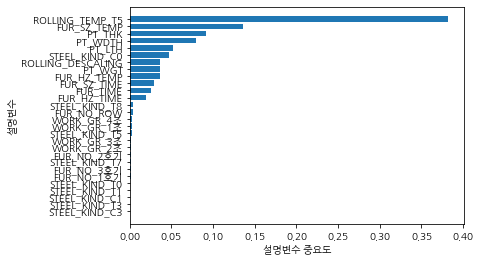

In [74]:
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

### 4) 그래디언트 부스팅

In [75]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,...,STEEL_KIND_T5,STEEL_KIND_T7,STEEL_KIND_T8,FUR_NO_1호기,FUR_NO_2호기,FUR_NO_3호기,WORK_GR_1조,WORK_GR_2조,WORK_GR_3조,WORK_GR_4조
0,0,32.25,3707,15109,14180,1,1144,116,1133,59,...,0,0,0,1,0,0,0,1,0,0
1,0,32.25,3707,15109,14180,2,1144,122,1135,53,...,0,0,0,1,0,0,0,1,0,0
2,0,33.27,3619,19181,18130,1,1129,116,1121,55,...,0,0,1,0,1,0,0,0,1,0
3,0,33.27,3619,19181,18130,2,1152,125,1127,68,...,0,0,1,0,1,0,0,0,1,0
4,0,38.33,3098,13334,12430,1,1140,134,1128,48,...,0,0,1,0,0,1,1,0,0,0


In [76]:
df_raw_x = df_raw_dummy.drop("SCALE", axis = 1, inplace = False)
df_raw_y = df_raw_dummy["SCALE"] 

# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: 랜덤)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, # 설명변수 데이터
                                                                df_raw_y, # 목표변수 데이터
                                                                test_size = 0.3, # test 데이터의 비율
                                                                random_state = 1234)  # random state

In [77]:
gb_uncustomized = GradientBoostingClassifier(random_state=1234)
gb_uncustomized.fit(df_train_x, df_train_y)
print("Accuracy on training set : {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set : {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 0.986
Accuracy on test set : 0.944


In [78]:
gb_uncustomized.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 1234,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

스케일 조정 후 모델 생성

In [79]:
df_train_x_scaled = scale(df_train_x, axis = 0)
df_test_x_scaled = scale(df_test_x, axis = 0)
pd.DataFrame(df_train_x_scaled, columns = df_train_x.columns).head()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,...,STEEL_KIND_T5,STEEL_KIND_T7,STEEL_KIND_T8,FUR_NO_1호기,FUR_NO_2호기,FUR_NO_3호기,WORK_GR_1조,WORK_GR_2조,WORK_GR_3조,WORK_GR_4조
0,-0.800338,0.932426,1.241863,2.044550,-1.0,-0.611378,-0.361454,-1.012752,1.762084,1.143315,...,-0.256006,-0.242536,-0.384791,-0.716599,1.420551,-0.700803,1.713914,-0.552901,-0.568185,-0.604858
1,0.463990,0.632792,-1.285409,-1.054514,-1.0,-1.088589,-0.693281,-0.844239,1.262401,-0.459338,...,-0.256006,-0.242536,2.598816,-0.716599,-0.703952,1.426935,-0.583460,1.808642,-0.568185,-0.604858
2,0.032851,-0.992966,-0.236699,-0.338027,-1.0,-0.086447,-0.389106,0.335355,0.685844,-0.349568,...,-0.256006,-0.242536,-0.384791,-0.716599,1.420551,-0.700803,1.713914,-0.552901,-0.568185,-0.604858
3,1.877400,-0.587010,-1.588275,-1.048536,1.0,-0.849983,0.578721,-0.956581,-0.121336,1.121361,...,-0.256006,-0.242536,2.598816,-0.716599,-0.703952,1.426935,1.713914,-0.552901,-0.568185,-0.604858
4,0.038046,-1.665694,0.056576,-1.025025,1.0,-1.708962,1.159418,-1.630634,-0.428833,0.506644,...,-0.256006,-0.242536,-0.384791,1.395481,-0.703952,-0.700803,-0.583460,-0.552901,-0.568185,1.653280


In [80]:
train_accuracy=[]; test_accuracy=[]
para_n_tree = [n_tree * 10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingClassifier(n_estimators = v_n_estimators, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

In [81]:
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,0.927,0.931
1,20,0.929,0.931
2,30,0.946,0.935
3,40,0.948,0.935
4,50,0.954,0.935
5,60,0.966,0.935
6,70,0.972,0.944
7,80,0.976,0.940
8,90,0.982,0.949
9,100,0.986,0.944


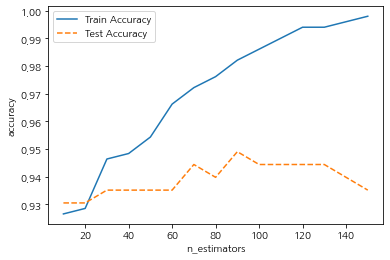

In [82]:
plt.plot(para_n_tree, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle="--", label="Test Accuracy")
plt.xlabel("n_estimators");plt.ylabel("accuracy")
plt.legend()

In [83]:
n_estimators = 90

In [84]:
gb_final = GradientBoostingClassifier(min_samples_leaf = 1, max_depth = 3, n_estimators=90, learning_rate = 0.1, random_state=1234)
gb_final.fit(df_train_x, df_train_y)
print("Accuracy on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(gb_final.score(df_test_x, df_test_y)))
print("Confustion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy on training set: 0.982
Accuracy on test set: 0.949
Confustion matrix: 
[[145   0]
 [ 12  59]]
              precision    recall  f1-score   support

           0      0.924     1.000     0.960       145
           1      1.000     0.831     0.908        71

    accuracy                          0.944       216
   macro avg      0.962     0.915     0.934       216
weighted avg      0.949     0.944     0.943       216



In [85]:
df_importance = pd.DataFrame()
df_importance["Feature"] = df_train_x.columns
df_importance["Importance"] = gb_final.feature_importances_
df_importance.sort_values(by="Importance",ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
10,ROLLING_TEMP_T5,0.634
7,FUR_SZ_TEMP,0.149
11,ROLLING_DESCALING,0.087
0,PT_THK,0.026
6,FUR_HZ_TIME,0.018
8,FUR_SZ_TIME,0.016
2,PT_LTH,0.015
5,FUR_HZ_TEMP,0.014
9,FUR_TIME,0.014
1,PT_WDTH,0.008


Text(0, 0.5, '설명변수')

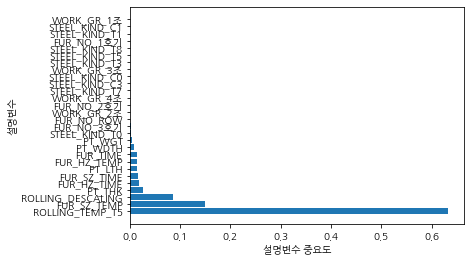

In [86]:
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

### 5) SVM

In [87]:
df_raw_x = df_raw_dummy.drop("SCALE", axis = 1, inplace = False)
df_raw_y = df_raw_dummy["SCALE"] 

# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: 랜덤)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, # 설명변수 데이터
                                                                df_raw_y, # 목표변수 데이터
                                                                test_size = 0.3, # test 데이터의 비율
                                                                random_state = 1234)  # random state

In [88]:
svm_uncustomized = SVC(random_state = 1234)
svm_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(svm_uncustomized.score(df_train_x, df_train_y)))

# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(svm_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 0.683
Accuracy on test set: 0.671


In [89]:
v_feature_name = df_train_x.columns

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,...,STEEL_KIND_T5,STEEL_KIND_T7,STEEL_KIND_T8,FUR_NO_1호기,FUR_NO_2호기,FUR_NO_3호기,WORK_GR_1조,WORK_GR_2조,WORK_GR_3조,WORK_GR_4조
0,0.155812,1.738951,-1.390441,-1.103810,-0.994460,-0.543782,0.767342,-0.949149,-0.626453,-0.409268,...,-0.252023,-0.226042,-0.389872,1.414214,-0.700488,-0.713746,-0.596601,1.834022,-0.56024,-0.607307
1,0.155812,1.738951,-1.390441,-1.103810,1.005571,-0.543782,0.932981,-0.835252,-0.856618,-0.387221,...,-0.252023,-0.226042,-0.389872,1.414214,-0.700488,-0.713746,-0.596601,1.834022,-0.56024,-0.607307
2,0.209106,1.568896,-1.095771,-0.944112,-0.994460,-1.263141,0.767342,-1.632537,-0.779897,-0.409268,...,-0.252023,-0.226042,2.564946,-0.707107,1.427577,-0.713746,-0.596601,-0.545250,1.78495,-0.607307
3,0.209106,1.568896,-1.095771,-0.944112,1.005571,-0.160124,1.015800,-1.290843,-0.281206,0.340311,...,-0.252023,-0.226042,2.564946,-0.707107,1.427577,-0.713746,-0.596601,-0.545250,1.78495,-0.607307
4,0.473482,0.562094,-1.518889,-1.174562,-0.994460,-0.735611,1.264257,-1.233894,-1.048422,0.296219,...,-0.252023,-0.226042,2.564946,-0.707107,-0.700488,1.401058,1.676163,-0.545250,-0.56024,-0.607307


In [90]:
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.3, random_state = 1234)

In [91]:
svm_scaled = SVC(random_state=1234)
svm_scaled.fit(df_scaled_train_x, df_train_y)
print("Accuracy on training set: {:.3f}".format(svm_scaled.score(df_scaled_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(svm_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy on training set: 0.875
Accuracy on test set: 0.829


## 6. 모델 평가

In [92]:
model = ["DecisionTree", "RandomForest", "GradientBoosting", "SVM"]
train_accuracy = []
model_auc = []
model_precision = []; model_recall = []
test_accuracy = []
model_f1_score = []

In [93]:
train_accuracy.append(tree_final.score(df_train_x, df_train_y))
test_accuracy.append(tree_final.score(df_test_x, df_test_y))

y_pred = tree_final.predict(df_test_x)

fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

model_auc.append(roc_auc)

model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

model_f1_score.append(f1_score(df_test_y, y_pred))

In [94]:
train_accuracy.append(rf_final.score(df_train_x, df_train_y))
test_accuracy.append(rf_final.score(df_test_x, df_test_y))

y_pred = rf_final.predict(df_test_x)

fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

model_auc.append(roc_auc)

model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

model_f1_score.append(f1_score(df_test_y, y_pred))

In [95]:
train_accuracy.append(gb_final.score(df_train_x, df_train_y))
test_accuracy.append(gb_final.score(df_test_x, df_test_y))

y_pred = gb_final.predict(df_test_x)

fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

model_auc.append(roc_auc)

model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

model_f1_score.append(f1_score(df_test_y, y_pred))

In [96]:
train_accuracy.append(svm_scaled.score(df_train_x, df_train_y))
test_accuracy.append(svm_scaled.score(df_test_x, df_test_y))

y_pred = gb_final.predict(df_test_x)

fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

model_auc.append(roc_auc)

model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

model_f1_score.append(f1_score(df_test_y, y_pred))

In [97]:
df_eval = pd.DataFrame(index = model)
df_eval["TrainAccuracy"] = train_accuracy; df_eval["TestAccuracy"] = test_accuracy
df_eval["AUC"] = model_auc
df_eval["Precision"] = model_precision; df_eval["Recall"] = model_recall
df_eval["F1Score"] = model_f1_score
df_eval.round(3)

,TrainAccuracy,TestAccuracy,AUC,Precision,Recall,F1Score
DecisionTree,0.938,0.944,0.915,1.0,0.831,0.908
RandomForest,0.919,0.917,0.873,1.0,0.746,0.855
GradientBoosting,0.982,0.949,0.923,1.0,0.845,0.916
SVM,0.683,0.671,0.923,1.0,0.845,0.916


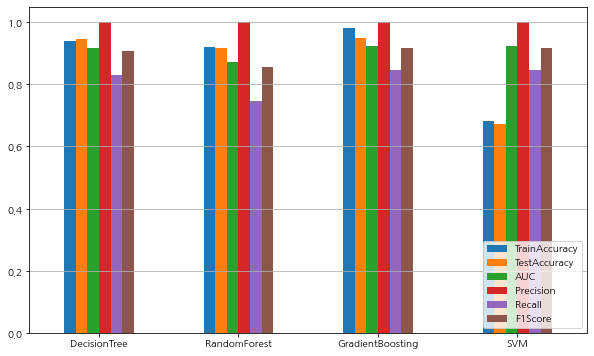

In [98]:
df_eval.plot.bar(rot=0, figsize=(10,6))
plt.legend(loc="lower right")
plt.grid(axis="y")

## 7. 결론

Gradient Boosting 모델이 가장 우수하다.

Gradient Boosting을 사용했을 때의 설명변수 중요도는 다음과 같다.

In [99]:
df_importance = pd.DataFrame()
df_importance["Feature"] = df_train_x.columns
df_importance["Importance"] = gb_final.feature_importances_
df_importance.sort_values(by="Importance",ascending=False, inplace = True)
df_importance[:6].round(3)

,Feature,Importance
10,ROLLING_TEMP_T5,0.634
7,FUR_SZ_TEMP,0.149
11,ROLLING_DESCALING,0.087
0,PT_THK,0.026
6,FUR_HZ_TIME,0.018
8,FUR_SZ_TIME,0.016


Text(0, 0.5, '설명변수')

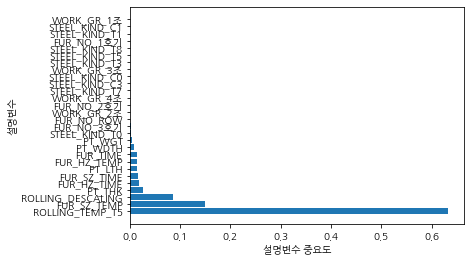

In [100]:
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

Gradient Boosting 모델의 결과로 나온 주요인자는 다음과 같다.

- Rolling_TEMP_T5, FUR_SZ_TEMP, ROLLING_DESCALING, PT_THK

가열대 온도, 가열로 균열대 온도, 압연 중 Descaling 횟수, Plate 두께이다. 그리고 앞서 EDA 단계에서 가열로 균열대 온도와 압연온도가 완벽한 정비례 관계이기 때문에 압연온도를 제거했었다. 따라서 압연온도 또한 주요 인자라고 할 수 있다.

로지스틱 회귀 분석시 본 영향도는 다음과 같다.

<AxesSubplot:>

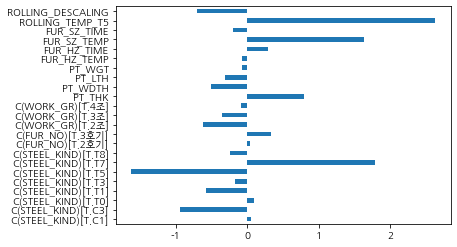

In [101]:
df_log_scaled_coef = pd.DataFrame({"Coef": scaled_log_result.params.values[1:]},
                                 index = scaled_log_model.exog_names[1:])
df_log_scaled_coef.plot.barh(y="Coef", legend=False)